Afonso Lavado | 20220631@novaims.unl.pt

Afonso Reyna | 20191197@novaims.unl.pt

Fernando Cruz | 20220646@novaims.unl.pt

Mariana Rodrigues | 20220627@novaims.unl.pt

Pedro Fernandes | 20220592@novaims.unl.pt 

Data Source | https://drive.google.com/file/d/1bs3GM_j9XScOEm-mNOG3ZEYg7-NVTc1C/view?usp=share_link

# Summary and Findings

---
## 1.1 - Summary

To develop our models, we drew upon various existing CNN architectures. In total, we constructed seven distinct models to determine which CNN architecture would yield the best results for our data. We began by setting up the necessary infrastructure, building the models, evaluating their performance, and ultimately selecting a winning model.

Given that our dataset consisted of 100,000 images (9 Gb), we opted to optimize performance by creating a separate dataset for testing purposes, consisting of 25% of the original images.


### 1.1.1 - Models used:
The following are the models we utilized:

1. CNN Complex: This was our base model. It employed 32, 64, 128, and 256 filters in the Conv2D layer, ReLu as activation function, an input shape of (256, 224) and finally a dropout of 0.2.

2. CNN Simple: This model was similar to the Complex, but with fewer layers.

3. CNN Sigmoid: This model was identical to the Complex, but with Sigmoid as activation function.

4. CNN Filters: This model was identical to the Complex, but with fewer filters (16, 32, 64, and 128).

5. CNN Dropout: This model utilized the same architecture as the Complex, but with a dropout of 0.5.

6. CNN Augmentation: This model was identical to the Complex, but with data augmentation.

7. CNN 128x128: This model was identical to the Complex, but with an input shape of (128, 128).


### 1.1.2 - Model Evaluation:
We evaluated the performance of our models by analyzing their validation accuracy and loss values throughout the training epochs. We set a maximum of 10 epochs for training and to avoid overfitting, we employed early stopping techniques that halt the training process when the validation accuracy stops improving after 2 consecutives epochs. This helps improve the model's generalization performance and ensures that it is not overfitting the training data.


### 1.1.3 - Best model
After plotting the accuracies of each model, we carefully analyzed the performance of each one and considered the changes that led to better results. As a result, we were able to select the winning model. The final model architecture includes (16, 32, 64, 128) filters, Sigmoid activation function, Dropout = 0.2 and input shape = (128,128). These specific choices were made based on the model's performance during evaluation and the desired outcome of optimizing accuracy while minimizing overfitting.

---
## 1.2 - Findings

### 1.2.1 - Test Accuracy:
1. Complex: 0.698
2. Simple: 0.636
3. Sigmoid: 0.718
4. Filters: 0.690
5. Dropout: 0.708
6. Augmentation: 0.066
6. 128x128: 0.701

### 1.2.2 - Conclusion:
1. A simpler model performed worse and did not provide a significant improvement in efficiency.
2. The sigmoid activation function yielded better accuracy compared to ReLu activation functions.
3. Reducing the number of filters decreased complexity and number of epochs, and did not significantly decrease accuracy.
4. An increase in dropout rate led to an increase in test loss, indicating poor performance.
5. Augmentation did not yield any significant improvements and will not be used.
6. Using a 128x128 image size provided several advantages, including better accuracy and improved time efficiency.

Considering this, the "best" model produce the best results as the accuracy increased and the loss decreased.

Best Model Test Accuracy: 0.743.

# 1 - Accessing the Dataset and Imports


## 1.1 Imports

In [ ]:
# General libraries:
import os
import time
import shutil
import random
import zipfile
import numpy as np
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Image library:
from PIL import Image

# Keras library:
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras import Sequential, layers, initializers, regularizers, optimizers, metrics

## 1.2 Dataset

Downloading the Dataset already cleaned from [1.Explore](https://colab.research.google.com/drive/1Ua6NoE4tbEDJxWTAzYEgbvSAFXwVv_uG) Notebook.

In [ ]:
#Downloading the Dataset
!gdown --fuzzy https://drive.google.com/file/d/1bs3GM_j9XScOEm-mNOG3ZEYg7-NVTc1C/view?usp=share_link

In [ ]:
#Extracting the Dataset to Content
zip_ = zipfile.ZipFile('Sports10_clean.zip')
zip_.extractall()
zip_.close()

In [ ]:
# If it's not possible to download due to error: Access denied
# Change flag 'run' to TRUE and run the following cell 

In [ ]:
# PS: This only works if the file is stored locally in the drive
run = False
if run:
  from google.colab import drive
  drive.mount('/content/gdrive')
  !unzip gdrive/My\Drive/DL/Sports10_clean.zip

## 1.3 Visualizing

The objective is to determine whether randomly selected images can be accessed.

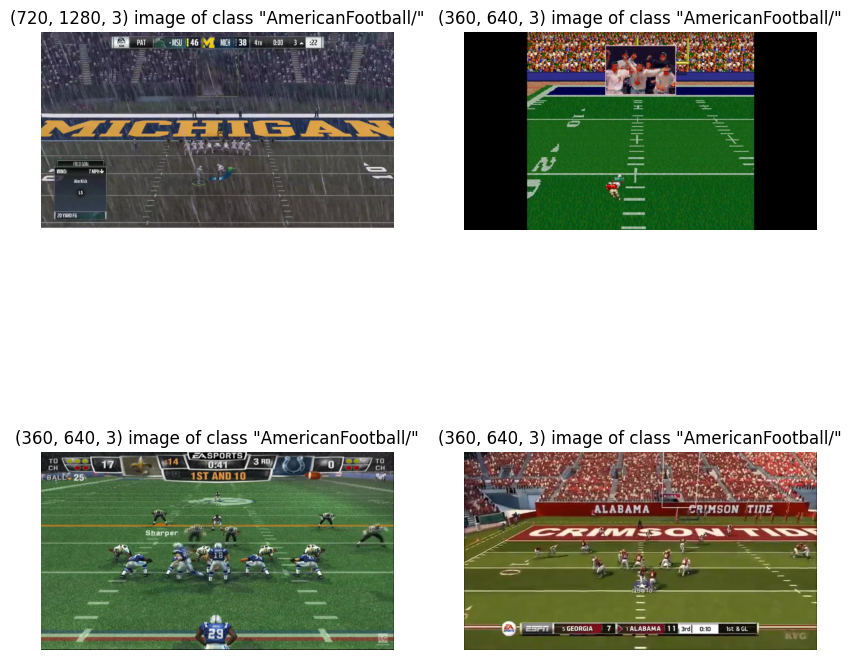

In [ ]:
# Defining path variables: 
path = "/content/content/"
main_folder = "Sports10_clean/"
training_folder = "training_set/"
testing_folder = "test_set/"
class_ = "AmericanFootball/"

# Build a connection string
full_path = path + main_folder + training_folder + class_
# Get 4 random images
images = random.sample(os.listdir(full_path), 4)
# Plot the images
plt.figure(figsize=(10, 10))
for i, img in enumerate(images):
    img = mpimg.imread(full_path + img)
    ax = plt.subplot(2, 2,  i + 1)
    plt.imshow(img)
    plt.title("{} image of class \"{}\"".format(img.shape, class_))
    plt.axis("off")

As it can be seen, the dataset contains images of different sizes and pixel configurations, including variations in the color code "rgb" (red, green, and blue), indicated as number 3.

# 2 - Models

## 2.0 Setup

To ensure consistency in our modeling approach, it is necessary to define certain variables and create training and testing datasets before building multiple models for performance comparison. This foundational work is a crucial step in the modeling process and must be completed at the outset.

In [ ]:
# define parameters
path = "/content/content/"
main_folder = "Sports10_clean/"
training_folder = "training_set/"
testing_folder = "test_set/"
image_size=(256, 224) # smallest pixel configuration
crop_to_aspect_ratio=True
color_mode='rgb'
batch_size=256
label_mode="categorical"
validation_split=0.2
shuffle=True
seed=0

To ensure consistency and avoid potential issues, it is recommended to remove any ".ipynb_checkpoints" folders from the dataset.


In [ ]:
rmdir /content/content/Sports10_clean/training_set/".ipynb_checkpoints"

In [ ]:
ds_train, ds_val = image_dataset_from_directory(path + main_folder + training_folder, 
                                                image_size=image_size,
                                                crop_to_aspect_ratio=crop_to_aspect_ratio,
                                                color_mode=color_mode,
                                                batch_size=batch_size,
                                                label_mode=label_mode,
                                                subset='both',
                                                validation_split=validation_split, 
                                                shuffle=shuffle,
                                                seed=seed)
# Check consistency
print("Classes:", ds_train.class_names)

Found 72552 files belonging to 10 classes.
Using 58042 files for training.
Using 14510 files for validation.
Classes: ['AmericanFootball', 'Basketball', 'BikeRacing', 'CarRacing', 'Fighting', 'Hockey', 'Soccer', 'TableTennis', 'Tennis', 'Volleyball']


This next line defines the shape of the input to the model, and is used later in each model so that the layers can be constructed correctly based on the shape of the input data.

In [ ]:
# Create an iterator for the training dataset
iter_train = iter(ds_train)

# Get the next batch of input and output data from the iterator
batch_x_train, batch_y_train = iter_train.next()

# Check its shapes:
print("batch_x_train shape: ", batch_x_train.shape)
print("batch_y_train shape: ", batch_y_train.shape)

batch_x_train shape:  (256, 256, 224, 3)
batch_y_train shape:  (256, 10)


In [ ]:
input_shape = tuple(batch_x_train.shape)
input_shape

(256, 256, 224, 3)

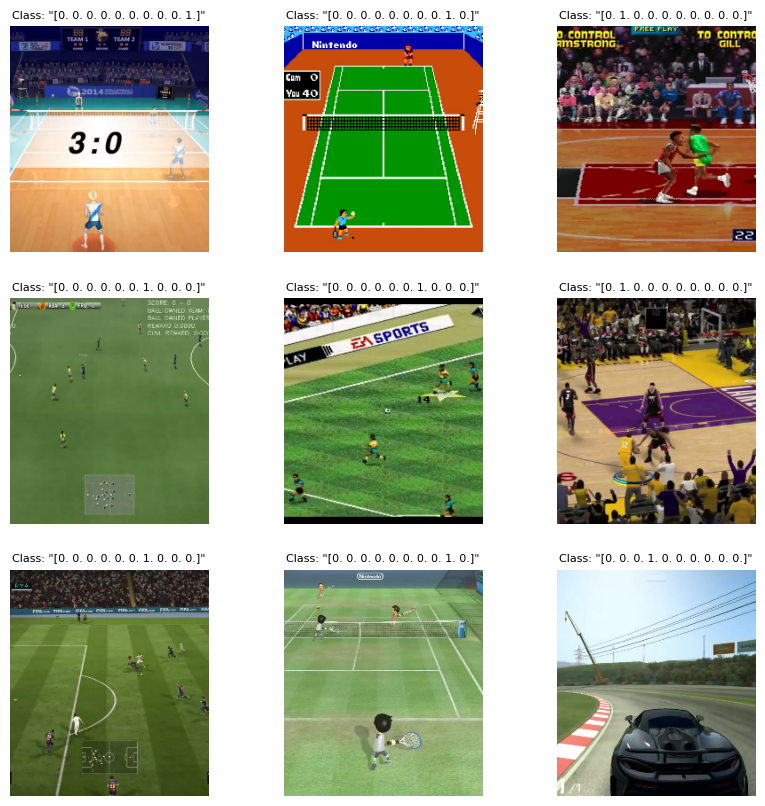

In [ ]:
# defining a grid_size of 3 by 3 (with 9 images total (3*3)):
grid_size=(3, 3)
n_images = 9

# Get a random batch via iteration
iter_ = iter(ds_train)
batch_x, batch_y = iter_.next()
batch_x, batch_y = batch_x[0:n_images], batch_y[0:n_images]

# Plot the images
plt.figure(figsize=(10, 10))
for i, (img, y) in enumerate(zip(batch_x, batch_y)):
    ax = plt.subplot(grid_size[0], grid_size[1],  i + 1)
    plt.imshow(tf.cast(img, tf.int32))
    plt.title("Class: \"{}\"".format(y), size=8)
    plt.axis("off")

To ensure consistency and avoid potential issues, it is recommended to remove any ".ipynb_checkpoints" folders from the dataset.

In [ ]:
rmdir /content/content/Sports10_clean/test_set/".ipynb_checkpoints"

In [ ]:
ds_test = image_dataset_from_directory(path + main_folder + testing_folder, 
                                       image_size=image_size,
                                       crop_to_aspect_ratio=crop_to_aspect_ratio,
                                       color_mode=color_mode,
                                       batch_size=batch_size,
                                       label_mode=label_mode,                                     
                                       shuffle=shuffle,
                                       seed=seed)

Found 27448 files belonging to 10 classes.


This next line of the code is creating a Sequential model called preprocess, which is used for preprocessing the input images before feeding them to the main model. Specifically, it is applying a Rescaling layer to rescale the pixel values of the images from [0, 255] to [0, 1].

In [ ]:
preprocess = Sequential([layers.Rescaling(1./255)], name="preprocessing")

## 2.1 Building

This section focuses on building seven different models, each with slight variations to compare their accuracy. By constructing multiple models, we aim to identify the best architecture that yields the highest accuracy on our dataset.

### 2.1.1 CNN Complex

"cnn_complex" model is a convolutional neural network designed for image classification tasks. The model architecture includes four convolutional layers with increasing filter sizes (32, 64, 128, and 256), followed by max pooling layers to reduce the spatial dimensions of the feature maps. The model also includes batch normalization layers to help with training stability, and dropout layers to prevent overfitting. The final layers consist of two fully connected layers (256 and 128 neurons respectively) with ReLU activation functions, followed by a softmax activation output layer with 10 neurons corresponding to the number of classes in the classification problem. The model uses the Adam optimizer and the categorical cross-entropy loss function.

In [ ]:
# Architecture
cnn_complex = Sequential([
    preprocess,
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, name='conv1'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu', name='conv2'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu', name='conv3'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(256, (3, 3), activation='relu', name='conv4'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    
    layers.Dropout(0.2),
    
    layers.Dense(256, activation='relu', name='dense1'),
    layers.Dropout(0.2),
    
    layers.Dense(128, activation='relu', name='dense2'),
    
    layers.Dense(10, activation='softmax', name='output')
    ],
  name = 'CNN-complex')

# Build model
cnn_complex.build(input_shape)

# Check Network
cnn_complex.summary()

Model: "CNN-complex"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 preprocessing (Sequential)  (256, 256, 224, 3)        0         
                                                                 
 conv1 (Conv2D)              (256, 254, 222, 32)       896       
                                                                 
 batch_normalization (BatchN  (256, 254, 222, 32)      128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (256, 127, 111, 32)      0         
 )                                                               
                                                                 
 conv2 (Conv2D)              (256, 125, 109, 64)       18496     
                                                                 
 batch_normalization_1 (Batc  (256, 125, 109, 64)      

From this point onwards, we will consider CNN Complex as the standard model and make minor modifications to the model's parameters to conduct better comparisons.

### 2.1.2 CNN Simple

This model has only two convolutional layers with fewer filters, and no batch normalization layers. It also has a simpler dense layer with fewer neurons.

In [ ]:
# Architecture
cnn_simple = Sequential([
    preprocess,
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, name='conv1'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu', name='conv2'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    
    layers.Dropout(0.2),
    
    layers.Dense(64, activation='relu', name='dense1'),
    
    layers.Dense(10, activation='softmax', name='output')
    ],
  name='CNN-simple')

# Build model
cnn_simple.build(input_shape)

# Check Network
cnn_simple.summary()

Model: "CNN-simple"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 preprocessing (Sequential)  (256, 256, 224, 3)        0         
                                                                 
 conv1 (Conv2D)              (256, 254, 222, 32)       896       
                                                                 
 max_pooling2d_4 (MaxPooling  (256, 127, 111, 32)      0         
 2D)                                                             
                                                                 
 conv2 (Conv2D)              (256, 125, 109, 64)       18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (256, 62, 54, 64)        0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (256, 214272)             0

### 2.1.3 CNN Sigmoid

The next model differs from the Complex one only in its activation function, which is changed from ReLU to Sigmoid.

In [ ]:
# Architecture
cnn_sigmoid = Sequential([
    preprocess,
    layers.Conv2D(32, (3, 3), activation='sigmoid', input_shape=input_shape, name='conv1'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='sigmoid', name='conv2'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='sigmoid', name='conv3'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(256, (3, 3), activation='sigmoid', name='conv4'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    
    layers.Dropout(0.2),
    
    layers.Dense(256, activation='sigmoid', name='dense1'),
    layers.Dropout(0.2),
    
    layers.Dense(128, activation='sigmoid', name='dense2'),
    
    layers.Dense(10, activation='softmax', name='output')
    ],
  name = 'CNN-sigmoid')

# Build model
cnn_sigmoid.build(input_shape)

# Check Network
cnn_sigmoid.summary()

Model: "CNN-sigmoid"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 preprocessing (Sequential)  (256, 256, 224, 3)        0         
                                                                 
 conv1 (Conv2D)              (256, 254, 222, 32)       896       
                                                                 
 batch_normalization_4 (Batc  (256, 254, 222, 32)      128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (256, 127, 111, 32)      0         
 2D)                                                             
                                                                 
 conv2 (Conv2D)              (256, 125, 109, 64)       18496     
                                                                 
 batch_normalization_5 (Batc  (256, 125, 109, 64)      

### 2.1.4 CNN Filters

The subsequent model is similar to the Complex CNN, except for its filter units. It employs a configuration of (16, 32, 64, and 128) filters for the convolutional layers and (128 and 64 neurons) for the fully connected layers, using fewer filters overall.

In [ ]:
# Architecture
cnn_filters = Sequential([
    preprocess,
    layers.Conv2D(16, (3, 3), activation='relu', input_shape=input_shape, name='conv1'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(32, (3, 3), activation='relu', name='conv2'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu', name='conv3'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu', name='conv4'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    
    layers.Dropout(0.2),
    
    layers.Dense(128, activation='relu', name='dense1'),
    layers.Dropout(0.2),
    
    layers.Dense(64, activation='relu', name='dense2'),
    
    layers.Dense(10, activation='softmax', name='output')
    ],
  name = 'CNN-Filters')

# Build model
cnn_filters.build(input_shape)

# Check Network
cnn_filters.summary()

Model: "CNN-Filters"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 preprocessing (Sequential)  (256, 256, 224, 3)        0         
                                                                 
 conv1 (Conv2D)              (256, 254, 222, 16)       448       
                                                                 
 batch_normalization_8 (Batc  (256, 254, 222, 16)      64        
 hNormalization)                                                 
                                                                 
 max_pooling2d_10 (MaxPoolin  (256, 127, 111, 16)      0         
 g2D)                                                            
                                                                 
 conv2 (Conv2D)              (256, 125, 109, 32)       4640      
                                                                 
 batch_normalization_9 (Batc  (256, 125, 109, 32)      

### 2.1.5 CNN Dropout

The subsequent model has the same architecture as the Complex model, except for a modification in the dropout rate. We increased the dropout rate from 0.2 to 0.5 to observe its impact on model performance.

In [ ]:
# Architecture
cnn_dropout = Sequential([
    preprocess,
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, name='conv1'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu', name='conv2'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu', name='conv3'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(256, (3, 3), activation='relu', name='conv4'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    
    layers.Dropout(0.5),
    
    layers.Dense(256, activation='relu', name='dense1'),
    layers.Dropout(0.5),
    
    layers.Dense(128, activation='relu', name='dense2'),
    
    layers.Dense(10, activation='softmax', name='output')
    ],
    name = 'CNN-Dropout')

# Build model
cnn_dropout.build(input_shape)

# Check Network
cnn_dropout.summary()

Model: "CNN-Dropout"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 preprocessing (Sequential)  (256, 256, 224, 3)        0         
                                                                 
 conv1 (Conv2D)              (256, 254, 222, 32)       896       
                                                                 
 batch_normalization_12 (Bat  (256, 254, 222, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_14 (MaxPoolin  (256, 127, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2 (Conv2D)              (256, 125, 109, 64)       18496     
                                                                 
 batch_normalization_13 (Bat  (256, 125, 109, 64)      

### 2.1.6 CNN Augmentation

The following model has an identical architecture to the Complex model, with the addition of an augmentation sequential sub-model. We anticipate that this will increase complexity, but in exchange, improve accuracy.

In [ ]:
augmentation = Sequential([
    layers.RandomFlip(mode='horizontal_and_vertical'),                            # Apply horizontal and vertical flips
    layers.RandomCrop(width=250, height=250),                                     # Randomly crop the image
    layers.RandomRotation(factor=0.35),                                           # Rotate images in the range [-20%*2pi, 20%*2pi]
    layers.RandomZoom(height_factor=(0.5, 0.5), width_factor=(0.5, 0.5)),         # Zoom images
    layers.RandomContrast(factor=0.60),                                           # Randomly adjust contrast
    layers.RandomBrightness(factor=0.74),                                         # Randomly adjust brightness
    layers.RandomTranslation(height_factor=(-0.1, 0.1), width_factor=(-0.1, 0.1), fill_mode="reflect")],
  name="data_augmentation_pipeline")

In [ ]:
# Architecture
cnn_augmentation = Sequential([
    preprocess,
    augmentation,
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, name='conv1'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu', name='conv2'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu', name='conv3'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(256, (3, 3), activation='relu', name='conv4'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    
    layers.Dropout(0.2),
    
    layers.Dense(256, activation='relu', name='dense1'),
    layers.Dropout(0.2),
    
    layers.Dense(128, activation='relu', name='dense2'),
    
    layers.Dense(10, activation='softmax', name='output')
    ],
  name = 'CNN-Augmentation')

# Build model
cnn_augmentation.build(input_shape)

# Check Network
cnn_augmentation.summary()

Model: "CNN-Augmentation"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 preprocessing (Sequential)  (256, 256, 224, 3)        0         
                                                                 
 data_augmentation_pipeline   (256, 250, 250, 3)       0         
 (Sequential)                                                    
                                                                 
 conv1 (Conv2D)              (256, 248, 248, 32)       896       
                                                                 
 batch_normalization_16 (Bat  (256, 248, 248, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_18 (MaxPoolin  (256, 124, 124, 32)      0         
 g2D)                                                            
                                                  

### 2.1.7 CNN 128x128

The next model retains the architecture of the Complex model, with the exception of reducing the input size to (128,128). We anticipate a reduction in complexity due to the smaller input dimensions, and hope that this change will lead to improved time and efficiency on this specific dataset.

In [ ]:
# Architecture
cnn_128x128 = Sequential([
    preprocess,
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 128, 128, 3), name='conv1'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu', name='conv2'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu', name='conv3'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(256, (3, 3), activation='relu', name='conv4'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    
    layers.Dropout(0.2),
    
    layers.Dense(256, activation='relu', name='dense1'),
    layers.Dropout(0.2),
    
    layers.Dense(128, activation='relu', name='dense2'),
    
    layers.Dense(10, activation='softmax', name='output')
    ],
    name = 'CNN-128x128')

# Build model
cnn_128x128.build((256, 128, 128, 3))

# Check Network
cnn_128x128.summary()

Model: "CNN-128x128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 preprocessing (Sequential)  (256, None, None, 3)      0         
                                                                 
 conv1 (Conv2D)              (256, 126, 126, 32)       896       
                                                                 
 batch_normalization_20 (Bat  (256, 126, 126, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_22 (MaxPoolin  (256, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2 (Conv2D)              (256, 61, 61, 64)         18496     
                                                                 
 batch_normalization_21 (Bat  (256, 61, 61, 64)        

To accommodate the input shape of 128x128 for this model, it's necessary to redefine the datasets ds_train, ds_val, and ds_test.

In [ ]:
ds_train_128x128, ds_val_128x128 = image_dataset_from_directory(path + main_folder + training_folder, 
                                                image_size=(128,128),
                                                crop_to_aspect_ratio=crop_to_aspect_ratio,
                                                color_mode=color_mode,
                                                batch_size=batch_size,
                                                label_mode=label_mode,
                                                subset='both',
                                                validation_split=validation_split, 
                                                shuffle=shuffle,
                                                seed=seed)

ds_test_128x128 = image_dataset_from_directory(path + main_folder + testing_folder, 
                                       image_size=(128,128),
                                       crop_to_aspect_ratio=crop_to_aspect_ratio,
                                       color_mode=color_mode,
                                       batch_size=batch_size,
                                       label_mode=label_mode,                                     
                                       shuffle=shuffle,
                                       seed=seed)

Found 72552 files belonging to 10 classes.
Using 58042 files for training.
Using 14510 files for validation.
Found 27448 files belonging to 10 classes.


## 2.2 Evaluating

In this section, we will compile and fit the models. We will then visualize their scores to compare their performances and better evaluate them.

### 2.2.1 Compile, Fit and Test

Implement simple early stopping to prevent overfitting and maximize accuracy for a classification problem.

In [ ]:
# 'patience'=2 allows for 2 consecutive epochs without validation accuracy improvement before stopping the training
# 'restore_best_weights'=True returns the best weights, not the last ones, avoiding overfitting
# 'min_delta' is a threshold, set to 0.001, to consider only significant validation accuracy improvements

es = EarlyStopping(monitor='val_accuracy', mode='max', patience=2, restore_best_weights=True, min_delta=0.001)

Creating a dictionary to store all the information needed regarding each model.

In [ ]:
# Compile models and store them in a nested dictionary
model_dict = {
    "Complex": {"model": cnn_complex, "history": None, "num_epochs": None, "time": None, "score": None},
    "Simple": {"model": cnn_simple, "history": None, "num_epochs": None, "time": None, "score": None},
    "Sigmoid": {"model": cnn_sigmoid, "history": None, "num_epochs": None, "time": None, "score": None},
    "Filters": {"model": cnn_filters, "history": None, "num_epochs": None, "time": None, "score": None},
    "Dropout": {"model": cnn_dropout, "history": None, "num_epochs": None, "time": None, "score": None},
    "Augmentation": {"model": cnn_augmentation, "history": None, "num_epochs": None, "time": None, "score": None}
    }

Using dictionary properties, compile and train all the different models using a for loop, and then store all the stats inside the dictionary.

In [ ]:
# Compile and fit models
learning_rate = 0.001
epochs = 10

for name, model_data in model_dict.items():
  start_time = time.time()
  print("--------------------- ", name, " --------------------")
  print()

  model = model_data["model"]

  # compile
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

  # fit
  history = model.fit(ds_train, epochs=epochs, validation_data=ds_val, callbacks=[es], verbose=0).history
  model_data["history"] = history
  
  # Extract best loss and accuracy values from history dictionary (considerating that the last 2 epochs have worse stats)
  print(f"Best loss: {history['loss'][-3]:.4f}")
  print(f"Best accuracy: {history['accuracy'][-3]:.4f}")
  print(f"Best validation loss: {history['val_loss'][-3]:.4f}")
  print(f"Best validation accuracy: {history['val_accuracy'][-3]:.4f}")

  # Store number of Epochs  
  num_epochs_total = len(history['loss'])
  model_data["num_epochs"] = num_epochs_total-2 # Last two are not stored
  print("Number of Epochs: ", num_epochs_total-2)

  # Store Time
  end_time = time.time()
  avg_time = (end_time - start_time)/num_epochs_total
  model_data["time"] = avg_time
  print("Total time taken (min): ", (end_time - start_time)/60)
  print("Average time per epoch (s)", avg_time)
  print()

---------------------  Complex  --------------------

Best loss: 0.0464
Best accuracy: 0.9905
Best validation loss: 0.0883
Best validation accuracy: 0.9897
Number of Epochs:  4
Total time taken (min):  5.322427924474081
Average time per epoch (s) 53.224279244740806

---------------------  Simple  --------------------

Best loss: 0.0060
Best accuracy: 0.9984
Best validation loss: 0.0127
Best validation accuracy: 0.9959
Number of Epochs:  4
Total time taken (min):  4.860644996166229
Average time per epoch (s) 48.60644996166229

---------------------  Sigmoid  --------------------

Best loss: 0.0366
Best accuracy: 0.9898
Best validation loss: 0.0371
Best validation accuracy: 0.9896
Number of Epochs:  8
Total time taken (min):  8.456468931833903
Average time per epoch (s) 50.73881359100342

---------------------  Filters  --------------------

Best loss: 0.0314
Best accuracy: 0.9917
Best validation loss: 0.0409
Best validation accuracy: 0.9908
Number of Epochs:  3
Total time taken (min):  

Similiar to the above cell, but for testing.

In [ ]:
# Evaluate models on test data and store scores
for name, model_data in model_dict.items():
  print("--------------------- ", name, " ---------------------")
  print()
  
  # Calculate score
  model = model_data["model"]
  score = model.evaluate(ds_test, verbose=0)
  print('Test loss:', score[0])
  print('Test accuracy:', score[1])

  # Store in the dict
  model_data["score"] = score
  print()

---------------------  Complex  ---------------------

Test loss: 5.678033828735352
Test accuracy: 0.6980472207069397

---------------------  Simple  ---------------------

Test loss: 2.4293053150177
Test accuracy: 0.6355289816856384

---------------------  Sigmoid  ---------------------

Test loss: 1.2476376295089722
Test accuracy: 0.7184129953384399

---------------------  Filters  ---------------------

Test loss: 2.78181791305542
Test accuracy: 0.6897770166397095

---------------------  Dropout  ---------------------

Test loss: 3.4449656009674072
Test accuracy: 0.7084304690361023

---------------------  Augmentation  ---------------------

Test loss: 2.309852123260498
Test accuracy: 0.06619790196418762



We need to train and test the CNN with an input shape of 128x128 separately because of its different input dimensions.

In [ ]:
start_time = time.time()
print("--------------------- 128x128 ---------------------")

# Compiling model cnn_128x128
cnn_128x128.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Calculating and storing variable 'history' for cnn_128x128 model
history_cnn_128x128 = cnn_128x128.fit(ds_train_128x128, epochs=epochs, validation_data=ds_val_128x128, callbacks=[es], verbose=0).history

# Extract best loss and accuracy values from history dictionary (considerating that the last 2 epochs have worse stats)
print(f"Best loss: {history_cnn_128x128['loss'][-3]:.4f}")
print(f"Best accuracy: {history_cnn_128x128['accuracy'][-3]:.4f}")
print(f"Best validation loss: {history_cnn_128x128['val_loss'][-3]:.4f}")
print(f"Best validation accuracy: {history_cnn_128x128['val_accuracy'][-3]:.4f}")

# Store number of epochs
num_epochs_total = len(history_cnn_128x128['loss'])
print("Number of Epochs: ", num_epochs_total-2)

# Store Time
end_time = time.time()
avg_time_cnn_128x128 = (end_time - start_time)/num_epochs_total
print("Total time taken (min): ", (end_time - start_time)/60)
print("Average time per epoch (s)", avg_time_cnn_128x128)

# Calculating and storing variable 'score' for cnn_128x128 model
score_cnn_128x128 = cnn_128x128.evaluate(ds_test_128x128, verbose=0)
print('CNN 128x128 Test loss:', score_cnn_128x128[0])
print('CNN 128x128 Test accuracy:', score_cnn_128x128[1])

# Creating a new entrance on the model_dict dictionary with the variables already calculated
model_dict["128x128"] = {"model": cnn_128x128, "history": history_cnn_128x128, "num_epochs": num_epochs_total-2, "time": avg_time_cnn_128x128,
                         "score": score_cnn_128x128}

--------------------- 128x128 ---------------------
Best loss: 0.0320
Best accuracy: 0.9924
Best validation loss: 0.0194
Best validation accuracy: 0.9948
Number of Epochs:  1
Total time taken (min):  2.24690066576004
Average time per epoch (s) 44.938013315200806
CNN 128x128 Test loss: 2.754101037979126
CNN 128x128 Test accuracy: 0.7011439800262451


The dictionary 'model_dict' contains some stored values that are not necessary.

In [ ]:
# To remove the last two values of each history key for each model, we iterate over the keys of 'model_dict'.
# Then, we access the corresponding history dictionary for that key and iterate over its keys.
# Finally, we assign to the history dictionary the sliced version of its corresponding value that excludes the last two elements.
# This effectively removes the last two values of each history key for each model.

for key in model_dict.keys():
    history_dict = model_dict[key]['history']
    for history_key in history_dict.keys():
        history_dict[history_key] = history_dict[history_key][:-2]

### 2.2.2 Visualizing Results

#### 2.2.2.1 Validation Accuracy

Generate a graph to facilitate the comparison of validation accuracy across models.

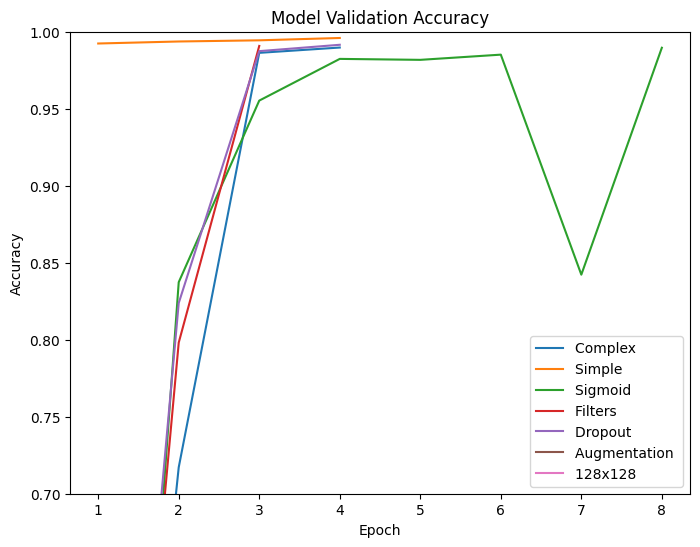

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

for name, model_data in model_dict.items():
    df_hist = pd.DataFrame.from_dict(model_data['history'])
    df_hist["Epoch"] = np.arange(1, len(df_hist) + 1, 1)

    # Plot Accuracy
    ax.plot(df_hist['Epoch'], df_hist['val_accuracy'], label=f'{name} ')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Accuracy')
    ax.set_ylim(0.7, 1)
    ax.set_title('Model Validation Accuracy')
    ax.legend()
    
plt.show()

#### 2.2.2.2 Validation Loss

Generate a graph to facilitate the comparison of validation loss across models.

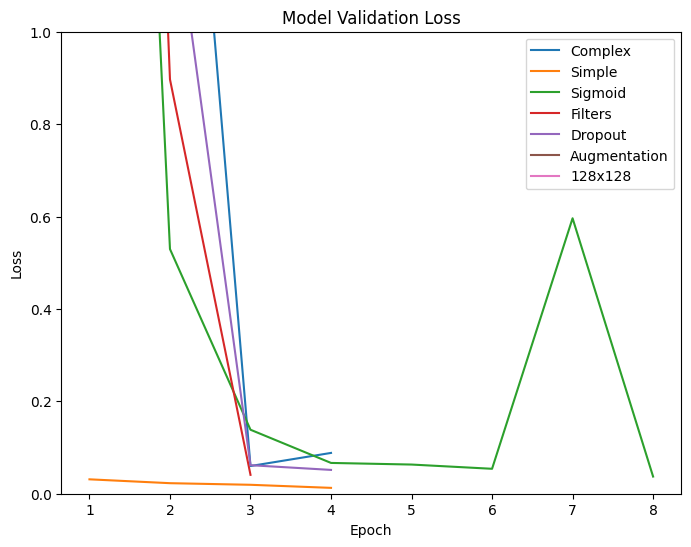

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

for name, model_data in model_dict.items():
    df_hist = pd.DataFrame.from_dict(model_data['history'])
    df_hist["Epoch"] = np.arange(1, len(df_hist) + 1, 1)

    # Plot Accuracy
    ax.plot(df_hist['Epoch'], df_hist['val_loss'], label=f'{name}')
    #ax.plot(df_hist['Epoch'], df_hist['accuracy'], label=f'{name} Train Accuracy', linestyle='--')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')
    ax.set_ylim(0,1)
    ax.set_title('Model Validation Loss')
    ax.legend()
plt.show()

#### 2.2.2.3 Test Scores

Generate a graph to facilitate the comparison of test scores across models.

The best model by test accuracy is Sigmoid with an accuracy of 0.7184
The best model by test loss is Sigmoid with a loss of 1.2476


<ipython-input-37-d2eb97891490>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([t[0] for t in test_scores], rotation=45)


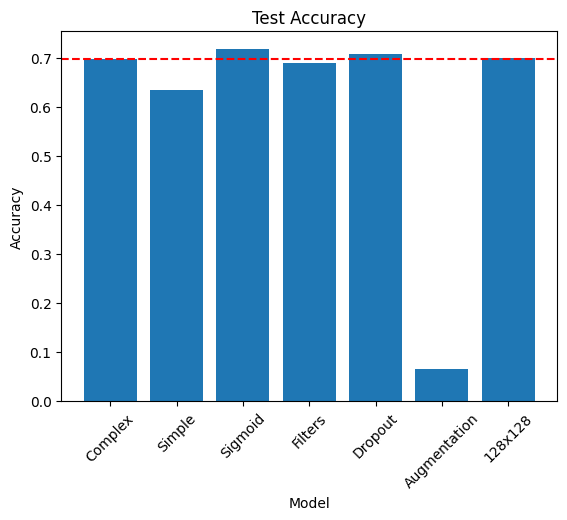

<ipython-input-37-d2eb97891490>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([t[0] for t in test_losses], rotation=45)


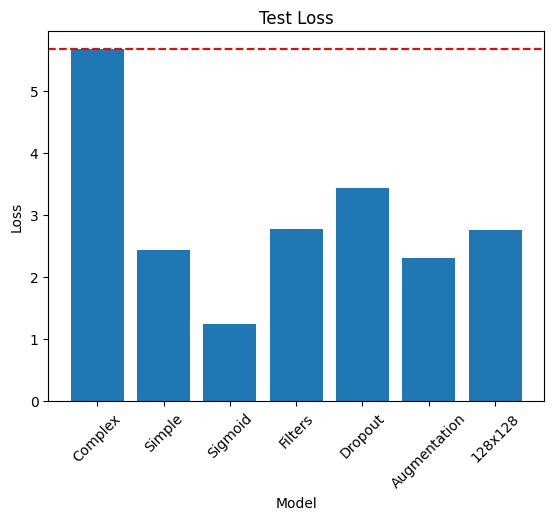

<ipython-input-37-d2eb97891490>:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([t[0] for t in epochs], rotation=45)


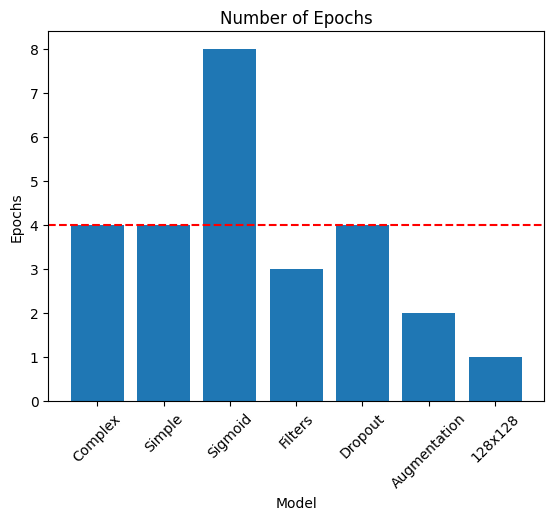

<ipython-input-37-d2eb97891490>:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([t[0] for t in times], rotation=45)


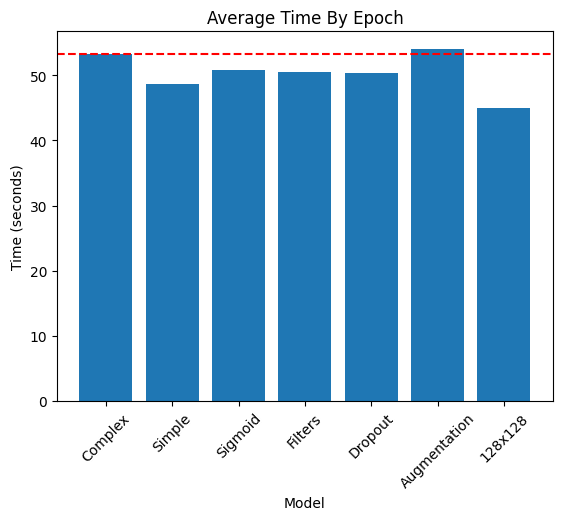

In [ ]:
test_scores = [(model_name, model_dict[model_name]['score'][1]) for model_name in model_dict.keys()]
test_losses = [(model_name, model_dict[model_name]['score'][0]) for model_name in model_dict.keys()]
num_epochs = [(model_name, model_dict[model_name]['num_epochs']) for model_name in model_dict.keys()]
times = [(model_name, model_dict[model_name]['time']) for model_name in model_dict.keys()]

# Print best test accuracy
best_model_acc = max(test_scores, key=lambda x: x[1])
print(f"The best model by test accuracy is {best_model_acc[0]} with an accuracy of {best_model_acc[1]:.4f}")

# Print best test loss
best_model_loss = min(test_losses, key=lambda x: x[1])
print(f"The best model by test loss is {best_model_loss[0]} with a loss of {best_model_loss[1]:.4f}")
print()

# Plot test scores
fig, ax = plt.subplots()
ax.bar([t[0] for t in test_scores], [t[1] for t in test_scores])
ax.set_title('Test Accuracy')
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_xticklabels([t[0] for t in test_scores], rotation=45)
# Add horizontal dashed line
ax.axhline(y=test_scores[0][1], color='red', linestyle='--')
plt.show()
print()

# Plot test losses
fig, ax = plt.subplots()
ax.bar([t[0] for t in test_losses], [t[1] for t in test_losses])
ax.set_title('Test Loss')
ax.set_xlabel('Model')
ax.set_ylabel('Loss')
ax.set_xticklabels([t[0] for t in test_losses], rotation=45)
# Add horizontal dashed line
ax.axhline(y=test_losses[0][1], color='red', linestyle='--')
plt.show()
print()

# Plot the number of epochs
fig, ax = plt.subplots()
ax.bar([t[0] for t in num_epochs], [t[1] for t in num_epochs])
ax.set_title('Number of Epochs')
ax.set_xlabel('Model')
ax.set_ylabel('Epochs')
ax.set_xticklabels([t[0] for t in epochs], rotation=45)
# Add horizontal dashed line
ax.axhline(y=num_epochs[0][1], color='red', linestyle='--')
plt.show()
print()

# Plot times
fig, ax = plt.subplots()
ax.bar([t[0] for t in times], [t[1] for t in times])
ax.set_title('Average Time By Epoch')
ax.set_xlabel('Model')
ax.set_ylabel('Time (seconds)')
ax.set_xticklabels([t[0] for t in times], rotation=45)
# Add horizontal dashed line
ax.axhline(y=times[0][1], color='red', linestyle='--')
plt.show()

Based on the analysis of the graphs above, the following conclusions can be drawn:

1. A simpler model performed worse and did not provide a significant improvement in efficiency.
2. The sigmoid activation function yielded better accuracy compared to ReLu activation functions.
3. Reducing the number of filters decreased complexity and number of epochs, and did not significantly decrease accuracy.
4. An increase in dropout rate led to an increase in test loss, indicating poor performance.
5. Augmentation did not yield any significant improvements and will not be used.
6. Using a 128x128 image size provided several advantages, including better accuracy and improved time efficiency.

Considering these factors, the winning model will take them into account during development.

### 2.2.3 Best Model

Based on the results obtained in the previous analysis, we will build what we consider to be the best model, train and test it. Then, we will compare its performance with the best model obtained from the previous experiments.

In [ ]:
# Archicture
cnn_best = Sequential([
    preprocess,
    layers.Conv2D(16, (3, 3), activation='sigmoid', input_shape=(256, 128, 128, 3), name='conv1'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(32, (3, 3), activation='sigmoid', name='conv2'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='sigmoid', name='conv3'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='sigmoid', name='conv4'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    
    layers.Dropout(0.2),
    
    layers.Dense(128, activation='sigmoid', name='dense1'),
    layers.Dropout(0.2),
    
    layers.Dense(64, activation='sigmoid', name='dense2'),
    
    layers.Dense(10, activation='softmax', name='output')
    ],
  name = 'CNN-Winner')

# Buil model
cnn_best.build((256, 128, 128, 3))

# Check network
cnn_best.summary()

Model: "CNN-Winner"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 preprocessing (Sequential)  (None, None, None, 3)     0         
                                                                 
 conv1 (Conv2D)              (256, 126, 126, 16)       448       
                                                                 
 batch_normalization_24 (Bat  (256, 126, 126, 16)      64        
 chNormalization)                                                
                                                                 
 max_pooling2d_26 (MaxPoolin  (256, 63, 63, 16)        0         
 g2D)                                                            
                                                                 
 conv2 (Conv2D)              (256, 61, 61, 32)         4640      
                                                                 
 batch_normalization_25 (Bat  (256, 61, 61, 32)        1

Having constructed our optimal model, we shall now proceed to train and test it, and append its performance statistics to the model dictionary.

In [ ]:
start_time = time.time()
print("--------------------- Best ---------------------")

# Compiling model cnn_best
cnn_best.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Calculating and storing variable 'history' for cnn_best model
history_cnn_best = cnn_best.fit(ds_train_128x128, epochs=epochs, validation_data=ds_val_128x128, callbacks=[es], verbose=0).history

# Extract best loss and accuracy values from history dictionary (considerating that the last 2 epochs have worse stats)
print(f"Best loss: {history_cnn_best['loss'][-3]:.4f}")
print(f"Best accuracy: {history_cnn_best['accuracy'][-3]:.4f}")
print(f"Best validation loss: {history_cnn_best['val_loss'][-3]:.4f}")
print(f"Best validation accuracy: {history_cnn_best['val_accuracy'][-3]:.4f}")

# Store number of epochs
num_epochs_total = len(history_cnn_best['loss'])
print("Number of Epochs: ", num_epochs_total-2)

# Store Time
end_time = time.time()
avg_time_cnn_best = (end_time - start_time)/num_epochs_total
print("Total time taken (min): ", (end_time - start_time)/60)
print("Average time per epoch (s)", avg_time_cnn_best)

# Calculating and storing variable 'score' for cnn_best model
score_cnn_best = cnn_best.evaluate(ds_test_128x128, verbose=0)
print('CNN Best Test loss:', score_cnn_best[0])
print('CNN Best Test accuracy:', score_cnn_best[1])

# Creating a new entrance on the model_dict dictionary with the variables already calculated
model_dict["Best"] = {"model": cnn_best, "history": history_cnn_best, "num_epochs": num_epochs_total-2, "time": avg_time_cnn_best,
                         "score": score_cnn_best}

--------------------- Best ---------------------
Best loss: 0.0168
Best accuracy: 0.9957
Best validation loss: 0.0126
Best validation accuracy: 0.9963
Number of Epochs:  3
Total time taken (min):  3.689768608411153
Average time per epoch (s) 44.27722330093384
CNN Best Test loss: 0.9631487131118774
CNN Best Test accuracy: 0.7425313591957092


### 2.2.4 Final Results

After adding the stats of the best_model to the dictionary, we will compare them with the other models to assess whether there is an improvement.

In [ ]:
# first, let's create a new dictonary to only visualize the best models, discarding the models that did not perform well

# keys_to_remove with the actual names of the keys you want to remove.
keys_to_remove = ["Complex", "Simple", "Augmentation", "Dropout"]

model_bests_dict = {k: v for k, v in model_dict.items() if k not in keys_to_remove}

print("New models keys: ", list(model_bests_dict.keys()))

New models keys:  ['Sigmoid', 'Filters', '128x128', 'Best']


Generate a graph to facilitate the comparison of test scores across models.

The best model by test accuracy is Best with an accuracy of 0.7425
The best model by test loss is Best with a loss of 0.9631



<ipython-input-51-81b2a33982f3>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([t[0] for t in test_scores], rotation=45)


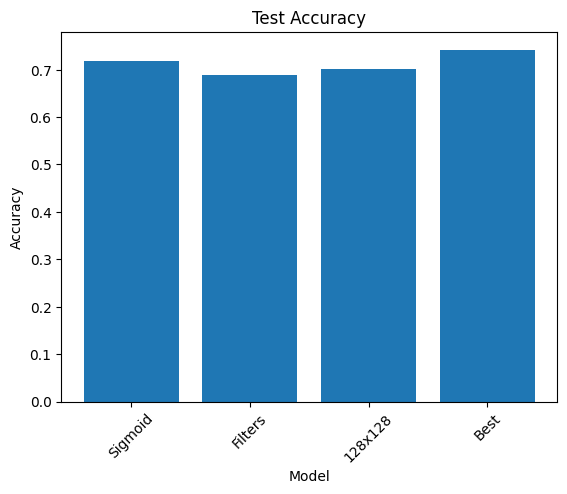

<ipython-input-51-81b2a33982f3>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([t[0] for t in test_losses], rotation=45)


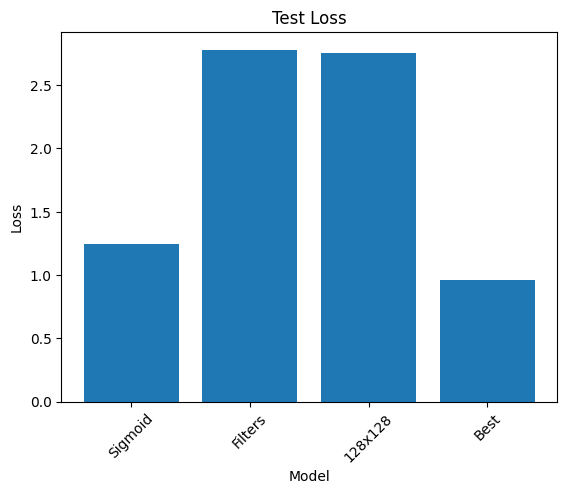

<ipython-input-51-81b2a33982f3>:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([t[0] for t in epochs], rotation=45)


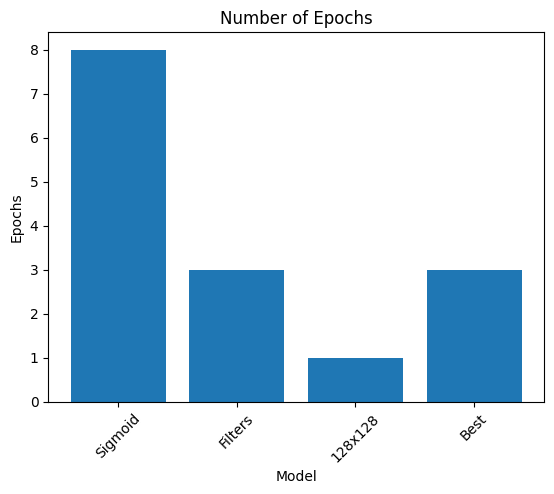

<ipython-input-51-81b2a33982f3>:51: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([t[0] for t in times], rotation=45)


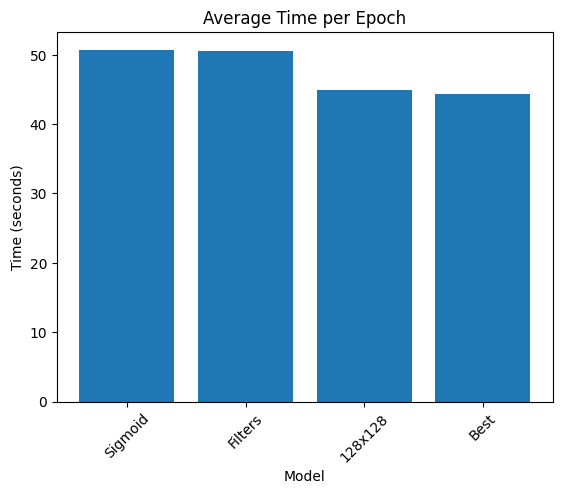

In [ ]:
test_scores = [(model_name, model_bests_dict[model_name]['score'][1]) for model_name in model_bests_dict.keys()]
test_losses = [(model_name, model_bests_dict[model_name]['score'][0]) for model_name in model_bests_dict.keys()]
num_epochs = [(model_name, model_bests_dict[model_name]['num_epochs']) for model_name in model_bests_dict.keys()]
times = [(model_name, model_bests_dict[model_name]['time']) for model_name in model_bests_dict.keys()]

# Print best test accuracy
best_model_acc = max(test_scores, key=lambda x: x[1])
print(f"The best model by test accuracy is {best_model_acc[0]} with an accuracy of {best_model_acc[1]:.4f}")

# Print best test loss
best_model_loss = min(test_losses, key=lambda x: x[1])
print(f"The best model by test loss is {best_model_loss[0]} with a loss of {best_model_loss[1]:.4f}")
print()

# Plot test scores
fig, ax = plt.subplots()
ax.bar([t[0] for t in test_scores], [t[1] for t in test_scores])
ax.set_title('Test Accuracy')
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_xticklabels([t[0] for t in test_scores], rotation=45)
plt.show()
print()

# Plot test losses
fig, ax = plt.subplots()
ax.bar([t[0] for t in test_losses], [t[1] for t in test_losses])
ax.set_title('Test Loss')
ax.set_xlabel('Model')
ax.set_ylabel('Loss')
ax.set_xticklabels([t[0] for t in test_losses], rotation=45)
plt.show()
print()

# Plot the number of epochs
fig, ax = plt.subplots()
ax.bar([t[0] for t in num_epochs], [t[1] for t in num_epochs])
ax.set_title('Number of Epochs')
ax.set_xlabel('Model')
ax.set_ylabel('Epochs')
ax.set_xticklabels([t[0] for t in epochs], rotation=45)
plt.show()
print()

# Plot times
fig, ax = plt.subplots()
ax.bar([t[0] for t in times], [t[1] for t in times])
ax.set_title('Average Time per Epoch')
ax.set_xlabel('Model')
ax.set_ylabel('Time (seconds)')
ax.set_xticklabels([t[0] for t in times], rotation=45)
plt.show()